# `Predicting Student Admissions with Neural Networks`
In this notebook, we predict student admissions to graduate school at UCLA based on three pieces of data:
- GRE Scores (Test)
- GPA Scores (Grades)
- Class rank (1-4)

The dataset originally came from here: http://www.ats.ucla.edu/

## `Loading the data` :

In [1]:
# Importing pandas and numpy :
import pandas as pd
import numpy as np

# Reading the csv file into a pandas DataFrame :
data = pd.read_csv('student_data.csv')

# Printing out the first 5 rows of our data :
data.head()

admit  gre   gpa  rank
0      0  380  3.61     3
1      1  660  3.67     3
2      1  800  4.00     1
3      1  640  3.19     4
4      0  520  2.93     4

## `Plotting the data` :

First let's make a plot of our data to see how it looks. In order to have a 2D plot, let's ingore the rank.

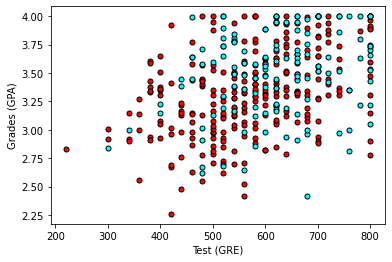

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

# Function to help us plot
def plot_points(data):
    X = np.array(data[["gre","gpa"]]) # X contains the column "gre" and "gpa"
    y = np.array(data["admit"])       # y contains the column "admit"
    admitted = X[np.argwhere(y==1)]   # this variable contains the column "gre" and "gpa" where "admit" == 1
    rejected = X[np.argwhere(y==0)]   # this variable contains the column "gre" and "gpa" where "admit" == 0
    # red -> rejected 
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
    # cyan -> admited 
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k') 
    plt.xlabel('Test (GRE)')
    plt.ylabel('Grades (GPA)')
    
# Plotting the points :
plot_points(data)
plt.show()

>Roughly, it looks like the students with high scores in the grades and test passed, while the ones with low scores didn't, the data is not as nicely separable as we hoped it would. `Maybe it would help to take the rank into account ?`             
>**Let's make 4 plots, each one for each rank.**        

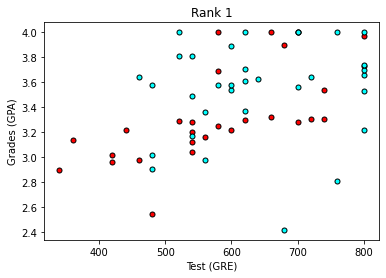

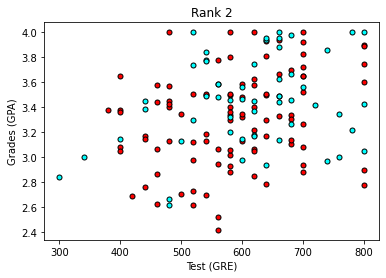

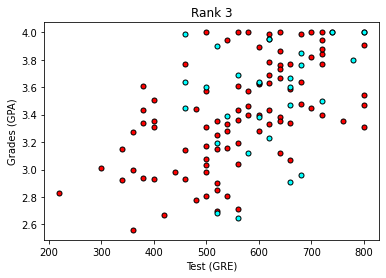

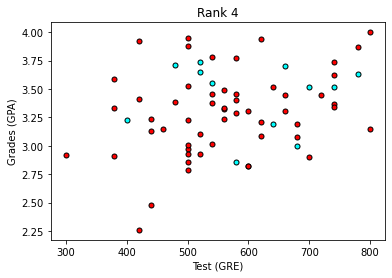

In [3]:
for i in range (1, 5):
    data_rank_i = data[data["rank"]==i] # Separating the ranks
    plot_points(data_rank_i) # Plotting the graphs
    plt.title("Rank " + str(i) )
    plt.show() 

>**This looks more promising**, as it seems that `the lower the rank, the higher the acceptance rate`. Let's use the rank as one of our inputs. In order to do this, we should one-hot encode it.

## `One-hot encoding` the rank :

#### What is `one-hot encoding`?
>**One-hot encoding** is an important step for preparing our dataset for use in machine learning. **One-hot encoding** `turns your categorical data into a binary vector representation`. Pandas get dummies makes this very easy!                                      
 This means that for each unique value in a column, a new column is created. The values in this column are represented as 1s and 0s, depending on whether the value matches the column header.

>For example, with the help of the `get_dummies` function, we turn this table below :
<table>
    <tbody>
        <tr>
            <td><b>Gender</b></td>
        </tr>
        <tr>
            <td>Male</td>
        </tr>
        <tr>
            <td>Female</td>
        </tr>
        <tr>
            <td>Male</td>
        </tr>
        <tr>
            <td>Male</td>
        </tr>
    </tbody>
</table>

> To this :
<table>
    <tbody>
        <tr>
            <td><b>Gender</b></td>
            <td><b>Male</b></td>
            <td><b>Female</b></td>
        </tr>
        <tr>
            <td>Male</td>
            <td>1</td>
            <td>0</td>
        </tr>
        <tr>
            <td>Female</td>
            <td>0</td>
            <td>1</td>
        </tr>
        <tr>
            <td>Male</td>
            <td>1</td>
            <td>0</td>
        </tr>
        <tr>
            <td>Male</td>
            <td>1</td>
            <td>0</td>
        </tr>
    </tbody>
</table>

In [4]:
# Making dummy variables for rank and concat existing columns :
one_hot_data = pd.concat([data, pd.get_dummies(data['rank'], prefix='rank')], axis=1)


# Droping the previous rank column :
one_hot_data = one_hot_data.drop('rank', axis=1)

# Printing the first 10 rows of our data :
one_hot_data[:10]

admit  gre   gpa  rank_1  rank_2  rank_3  rank_4
0      0  380  3.61       0       0       1       0
1      1  660  3.67       0       0       1       0
2      1  800  4.00       1       0       0       0
3      1  640  3.19       0       0       0       1
4      0  520  2.93       0       0       0       1
5      1  760  3.00       0       1       0       0
6      1  560  2.98       1       0       0       0
7      0  400  3.08       0       1       0       0
8      1  540  3.39       0       0       1       0
9      0  700  3.92       0       1       0       0

> As expected, the `rank` column was replaced by `rank_1`, `rank_2`, `rank_3` and `rank_4`

##  `Scaling the data` :
>The next step is to scale the data. We notice that the range for grades is **1.0 ⇿ 4.0**, whereas the range for test scores is roughly **200 ⇿ 800**, `which is much larger. This means our data is skewed, and that makes it hard for a neural network to handle`. 

>Let's fit our two features into a range of **0 ⇿ 1**, by dividing the grades by 4.0, and the test score by 800.

In [5]:
# Making a copy of our data :
processed_data = one_hot_data[:]

# TODO: Scale the columns
processed_data["gpa"] = processed_data["gpa"] / 4.0
processed_data["gre"] = processed_data["gre"] / 800.0

# Printing the first 10 rows of our procesed data :
processed_data[:10]

admit    gre     gpa  rank_1  rank_2  rank_3  rank_4
0      0  0.475  0.9025       0       0       1       0
1      1  0.825  0.9175       0       0       1       0
2      1  1.000  1.0000       1       0       0       0
3      1  0.800  0.7975       0       0       0       1
4      0  0.650  0.7325       0       0       0       1
5      1  0.950  0.7500       0       1       0       0
6      1  0.700  0.7450       1       0       0       0
7      0  0.500  0.7700       0       1       0       0
8      1  0.675  0.8475       0       0       1       0
9      0  0.875  0.9800       0       1       0       0

> As we can see, our data is now scaled and the values are all between **0 ⇿ 1**

## `Splitting the data into Training and Testing` :

>In order to **test our algorithm**, we'll `split the data into a Training and a Testing set`. The size of the testing set will be **10%** of the total data.

In [6]:
# sample contains the index number of 90% of the processed data, this data was randomnly chosen. 
sample = np.random.choice(processed_data.index, size=int(len(processed_data)*0.9), replace=False)

train_data, test_data = processed_data.iloc[sample], processed_data.drop(sample)

print("Number of training samples is", len(train_data))
print("Number of testing samples is", len(test_data))

Number of training samples is 360
Number of testing samples is 40


In [7]:
train_data[:10]

admit    gre     gpa  rank_1  rank_2  rank_3  rank_4
378      0  0.800  0.7800       0       0       1       0
253      1  0.675  0.8875       0       0       0       1
147      0  0.700  0.6775       0       0       1       0
139      1  0.750  0.8950       1       0       0       0
109      0  0.600  0.8625       0       1       0       0
101      0  0.725  0.8925       0       0       1       0
254      1  0.925  0.8800       0       0       0       1
95       0  0.825  0.8325       0       1       0       0
262      1  0.650  0.7975       0       0       1       0
25       1  1.000  0.9150       1       0       0       0

In [8]:
test_data[:10]

admit    gre     gpa  rank_1  rank_2  rank_3  rank_4
10      0  1.000  1.0000       0       0       0       1
12      1  0.950  1.0000       1       0       0       0
13      0  0.875  0.7700       0       1       0       0
44      0  0.875  0.7350       0       1       0       0
47      0  0.625  0.7425       0       0       0       1
59      0  0.750  0.7050       0       0       0       1
62      0  0.800  0.9175       0       0       1       0
71      0  0.375  0.7300       0       0       0       1
90      0  0.875  0.9575       0       1       0       0
93      0  0.725  0.7325       0       1       0       0

## `Splitting the data into features and targets (labels)` :
> Now, as a final step before the training, we'll split the data into features (X) and targets (y).

In [9]:
features = train_data.drop('admit', axis=1)
targets = train_data['admit']

features_test = test_data.drop('admit', axis=1)
targets_test = test_data['admit']

In [10]:
features[:10]

gre     gpa  rank_1  rank_2  rank_3  rank_4
378  0.800  0.7800       0       0       1       0
253  0.675  0.8875       0       0       0       1
147  0.700  0.6775       0       0       1       0
139  0.750  0.8950       1       0       0       0
109  0.600  0.8625       0       1       0       0
101  0.725  0.8925       0       0       1       0
254  0.925  0.8800       0       0       0       1
95   0.825  0.8325       0       1       0       0
262  0.650  0.7975       0       0       1       0
25   1.000  0.9150       1       0       0       0

In [11]:
targets[:10]

378    0
253    1
147    0
139    1
109    0
101    0
254    1
95     0
262    1
25     1
Name: admit, dtype: int64

## `Training the 1-layer Neural Network` :
>The following function trains the 1-layer neural network.                                     
>First, we'll write some helper functions.

In [12]:
# Activation (sigmoid) function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_prime(x):
    return sigmoid(x) * (1-sigmoid(x))
def error_formula(y, output):
    return - y*np.log(output) - (1 - y) * np.log(1-output)

# `Backpropagate the error` :
Now it's your turn to shine. Write the error term. Remember that this is given by the equation $$ (y-\hat{y})x $$ for binary cross entropy loss function and $$ (y-\hat{y})\sigma'(x)x $$ for mean square error. 

In [13]:
# TODO: Write the error term formula
def error_term_formula(x, y, output):
    return (y - output) * x

In [14]:
# Neural Network hyperparameters
epochs = 1000
learnrate = 0.0001

# Training function
def train_nn(features, targets, epochs, learnrate):
    
    # Use to same seed to make debugging easier
    np.random.seed(42)

    n_records, n_features = features.shape
    last_loss = None

    # Initialize weights
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)

    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features.values, targets):
            # Loop through all records, x is the input, y is the target

            # Activation of the output unit
            #   Notice we multiply the inputs and the weights here 
            #   rather than storing h as a separate variable 
            output = sigmoid(np.dot(x, weights))

            # The error term
            error_term = error_term_formula(x, y, output)

            # The gradient descent step, the error times the gradient times the inputs
            del_w += error_term

        # Update the weights here. The learning rate times the 
        # change in weights
        # don't have to divide by n_records since it is compensated by the learning rate
        weights += learnrate * del_w #/ n_records  

        # Printing out the mean square error on the training set
        if e % (epochs / 10) == 0:
            out = sigmoid(np.dot(features, weights))
            loss = np.mean(error_formula(targets, out))
            print("Epoch:", e)
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            print("=========")
    print("Finished training!")
    return weights
    
weights = train_nn(features, targets, epochs, learnrate)

Epoch: 0
Train loss:  0.7478990414075236
Epoch: 100
Train loss:  0.631028675753559
Epoch: 200
Train loss:  0.620162306696543
Epoch: 300
Train loss:  0.6171523524893742
Epoch: 400
Train loss:  0.6152639560451354
Epoch: 500
Train loss:  0.6138457253043311
Epoch: 600
Train loss:  0.6127457511699328
Epoch: 700
Train loss:  0.61187913392387
Epoch: 800
Train loss:  0.6111858563081982
Epoch: 900
Train loss:  0.6106220616203692
Finished training!


## Calculating the Accuracy on the Test Data

In [15]:
# Calculate accuracy on test data :
test_out = sigmoid(np.dot(features_test, weights))
predictions = test_out > 0.5
accuracy = np.mean(predictions == targets_test)
print("Prediction accuracy: {:.3f}".format(accuracy))

Prediction accuracy: 0.775


> In the end, we were able, with the help of `neural networks`, to predict student admissions with an accuracy of **77.5%**, which is not bad for data that is not well separable.

Notebook realised by  [@labriji_saad](https://github.com/labrijisaad) with the help of [udacity courses](https://www.udacity.com).